In [1]:
import tictactoe_env as ttte
import tictactoe_bot as tttb
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def game(env, bot1, bot2, with_human=False, render_flag=False):
    global win1, win2, state1, state2, ties, turn
    if not with_human:
        if turn == 0:
            r,s,done = env.step(bot1.marker, bot1.act(), render=render_flag)
            bot1.observe(s) 
            bot1.learn(r)
            bot2.observe(s)
            # Check if it is win and not the tie round
            if done:
                if not env.tie(): 
                    win1 += 1
                    bot2.learn(-5)
            # Check if it is tie round, give the second bot tie reward
                else: 
                    ties += 1
                    bot2.learn(r)
                return done
            turn = 1
        if turn == 1:
            r,s,done = env.step(bot2.marker, bot2.act(), render=render_flag)
            bot2.observe(s)
            bot2.learn(r)
            bot1.observe(s)
            if done: 
                if not env.tie():
                    win2 += 1
                    bot1.learn(-5)
                else:
                    ties += 1
                    bot1.learn(r)
                return done
            turn = 0
            state1 = len(bot1._qvalues)
            state2 = len(bot2._qvalues)
    else:
        if turn == 0:
            r,s,done = env.step(bot1.marker, bot1.act())
            bot1.observe(s) 
            bot1.learn(r)
            if done: 
                print('Done')
                return done
            turn = 1
        if turn == 1:
            player_move = [int(coord) for coord in input('Your move: ').split()]
            r,s,done = env.step('x', player_move)
            bot1.observe(s)
            if done: 
                print('Done')
                bot1.learn(-5)
                return done
            turn = 0

In [38]:
turn = 0
over = False
#agent1 = tttb.RLAgent('o', learning_rate=0.05, discount_factor=1, epsilon=0.8)
agent2 = tttb.RLAgent('x', learning_rate=0.05, discount_factor=0, epsilon=0.8)

env = ttte.TicTacToeEnv(3)
agent1.observe(env.state())
agent2.observe(env.state())

In [58]:
agent1_wins = []
agent2_wins = []
agent1_states = []
agent2_states = []

win1, win2 = 0, 0
ties = 0

epochs = 50
rounds = 10000

for epoch in range(0, epochs):
    print('Epoch #', epoch)
    for _round in range(0, rounds):
        state1, state2 = 0, 0
        while not over:
            over = game(env, agent1, agent2, render_flag=False)
        over = False
        env.reset()
        agent1_wins.append(win1)
        agent2_wins.append(win2)
        agent1_states.append(state1)
        agent2_states.append(state2)

print("Trained")

Epoch # 0
Epoch # 1
Epoch # 2
Epoch # 3
Epoch # 4
Epoch # 5
Epoch # 6
Epoch # 7
Epoch # 8
Epoch # 9
Epoch # 10
Epoch # 11
Epoch # 12
Epoch # 13
Epoch # 14
Epoch # 15
Epoch # 16
Epoch # 17
Epoch # 18
Epoch # 19
Epoch # 20
Epoch # 21
Epoch # 22
Epoch # 23
Epoch # 24
Epoch # 25
Epoch # 26
Epoch # 27
Epoch # 28
Epoch # 29
Epoch # 30
Epoch # 31
Epoch # 32
Epoch # 33
Epoch # 34
Epoch # 35
Epoch # 36
Epoch # 37
Epoch # 38
Epoch # 39
Epoch # 40
Epoch # 41
Epoch # 42
Epoch # 43
Epoch # 44
Epoch # 45
Epoch # 46
Epoch # 47
Epoch # 48
Epoch # 49
Trained


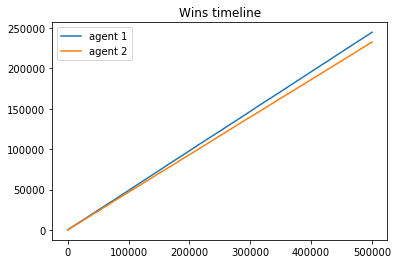

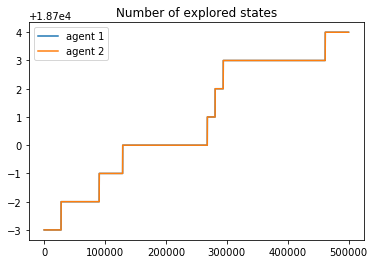

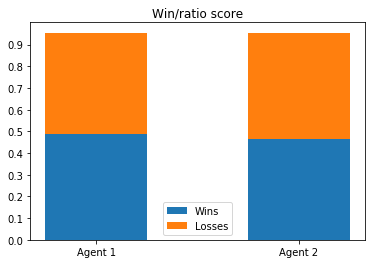

General info: 
	games played: 500000,
	ties: 22517
Agent 1: 
	wins: 48.96%, 
	losses: 46.54%
Agent 2: 
	wins: 46.54%, 
	losses: 48.96%


In [59]:
# Wins plot
agent1_wins_plot, = plt.plot([x for x in range (0,len(agent1_wins))], agent1_wins, label='agent 1') 
agent2_wins_plot, = plt.plot([x for x in range (0,len(agent2_wins))], agent2_wins, label='agent 2')
plt.legend(handles=[agent1_wins_plot, agent2_wins_plot])
plt.title('Wins timeline')
plt.show()

# Exploration plot
agent1_explore_plot, = plt.plot([x for x in range (0,len(agent1_states))], agent1_states, label='agent 1')
agent2_explore_plot, = plt.plot([x for x in range (0,len(agent1_states))], agent1_states, label='agent 2')
plt.legend(handles=[agent1_explore_plot, agent2_explore_plot])
plt.title('Number of explored states')
plt.show()

# Win/loss ratio
total_amount_of_games = epochs*rounds
wins_ratio = (agent1_wins[-1]/total_amount_of_games, 
              agent2_wins[-1]/total_amount_of_games)
loss_ratio = ((total_amount_of_games - agent1_wins[-1] - ties)/total_amount_of_games, 
              (total_amount_of_games - agent2_wins[-1] - ties)/total_amount_of_games)
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wins_ratio, width)
p2 = plt.bar(ind, loss_ratio, width,
             bottom=wins_ratio)

plt.title('Win/ratio score')
plt.xticks(ind, ('Agent 1', 'Agent 2'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Wins', 'Losses'))

plt.show()

print('General info: \n\tgames played: {0},\n\tties: {1}'.format(total_amount_of_games, ties))
print('Agent 1: \n\twins: %.2f%%, \n\tlosses: %.2f%%' % (wins_ratio[0]*100, loss_ratio[0]*100))
print('Agent 2: \n\twins: %.2f%%, \n\tlosses: %.2f%%' % (wins_ratio[1]*100, loss_ratio[1]*100))


In [ ]:
env.reset()
over = False
while not over:
    over = game(env, agent1, agent2, with_human=True)

In [ ]:
len(agent1._qvalues)